<h1>Primera practica "Hola Mundo"</h1>

<h2>Importar dependencias</h2>
Para comenzar se instalan las dependencias y librerias necesarias, en este caso con el comando !pip se isntalara tensorflow y con import se agregara la libreria numpy.

tensorflow es una plataforma de ML e IA que contiene distintas herramientas y librerias que permiten la construcción entrenamiento y despigue de diversos modelos de ML y DL.

numpy es una libreria de computo cientifico que permite la manipulacion de arreglos y matrices multidimensionales y realizar operaciones matemáticas complejas de alto nivel.

mathplotlib es otra libreria pero esta permite la visualización de datos para su analiís a traves de diversas tablas así como su personalización.

math es la libreria para operaciones basicas de python.

In [7]:
# Importar dependencias y librerias
!pip install tensorflow
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

<h2>Generación de datos</h2>
Con la libreria numpy se van a generar una serie de valores aleatorios para el modelado de la función seno

In [23]:
# Muestras de datos.
SAMPLES=1000

# Se establece un valor semilla para poder generar los valores aleatorios durante el tiempo que corra el notebook.
SEED=1337

np.random.seed(SEED)
tf.random.set_seed(SEED)

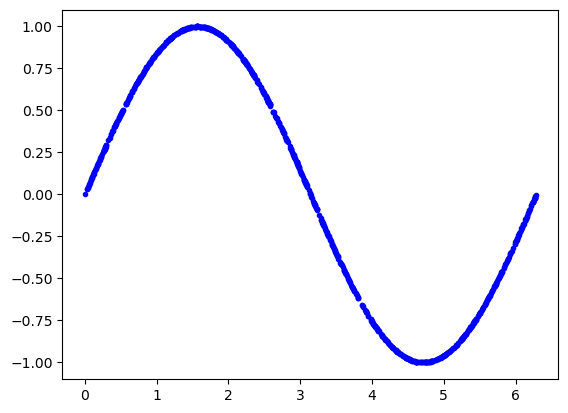

In [26]:
# Generar un conjunto de números aleatorios distribuidos uniformemente en el rango de 0 a 2pi, que cubre toda la oscilación de la onda senosoidal.
x_values=np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)
# Se mezclan los datos para garantizar que no esten en orden.
np.random.shuffle(x_values)
# Se calcula el seno de los valores correspondientes
y_values=np.sin(x_values)

# Se grafican los datos. El argumento "b" es unicamente para darle color.
plt.plot(x_values, y_values, 'b.')
plt.show()

la ventaja principal de trabajar con redes de aprendizaje profundo es que permiten indentificar los patrones del ruido y separarlos,
esto permite realizar predicciones precisas con datos reales llenos de ruido.
En el siguiente ejemplo se muestra como al agregarle ruido al cálculo de la función seno de igual forma logra modelar la curva.

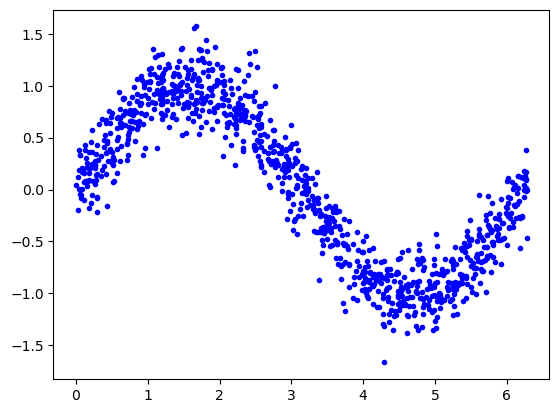

In [30]:
y_values+=0.1*np.random.randn(*y_values.shape)

#grafica
plt.plot(x_values, y_values, 'b.')
plt.show()

Como se observa al agregar un ruido a la función igual se ajustaron los puntos lo mas cercano a la forma de la curva seno, esto podria simular un entorno con datos del mundo real.

<h2>Dividir los datos</h2>

Un Conjunto de datos simpre debe dividirse en 3 partes:
* entrenamiento
* validación
* prueba

Para poder evaluar la precisión de un modelo que se entrena, se necesita comparar sus predicciones con datos reales y comprobar su coincidencia.
Esta evaluación se realiza durante el entrenamiento (validación) y después del entrenamiento (prueba). 
También es importante utilizar datos nuevos que no se hayan utilizado previamente para entrenar el modelo.
Para asegurarse de tener datos para la evaluación,se debe reservar algunos antes de comenzar el entrenamiento. 
Se reservara el 20 % de los datos para la validación y el otro 20 % para las pruebas y se utilizara el 60 % restante para entrenar el modelo, esta es una división típica al entrenar modelos.

In [33]:
# Datos de entrenamiento
TRAIN_SPLIT=int(0.6*SAMPLES)

#Datos de prueba
TEST_SPLIT=int(0.2*SAMPLES+TRAIN_SPLIT)

# la función n.split se partira en 3 el set de datos
x_train, x_validate, x_test=np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test=np.split(y_values,[TRAIN_SPLIT, TEST_SPLIT])

# Se agrega este assert para validar que los datos se dividieron correctamente
assert (x_train.size+x_validate.size+x_test.size)==SAMPLES

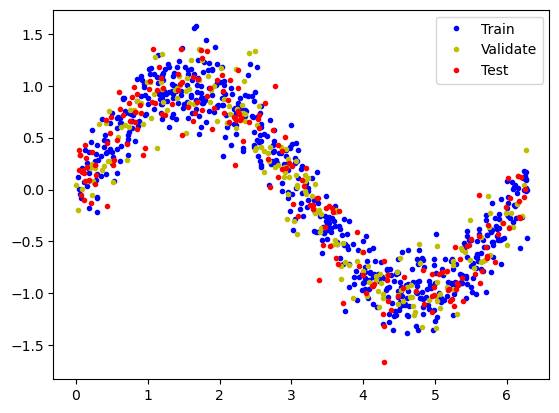

In [34]:
# Grafica
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()
plt.show()

<h2>Definir el modelo base</h2>

Con los datos generados ya se puede proceder a crear un modelo al cual entranar y ajustar.
Se construira un modelo que tomará un valor de entrada (en este caso, x) y lo usará para predecir un valor de salida (el seno de x), este tipo de problema se llama regresión. 
los modelos de regresión se pueden usar para todo tipo de tareas que requieren una salida numérica.
Un ejemplo de un modelo de regresión podría intentar predecir la velocidad de carrera de una persona en millas por hora basándose en los datos de un acelerómetro.

Para esta practica se creara un modelo de una red neuronal simple. Esta utiliza capas de neuronas para intentar aprender los patrones subyacentes a los datos de entrenamiento y así poder realizar predicciones.
Para ellos se utilizara keras un API de tensorflow que permite crear redes de aprendizaje profundo.

In [ ]:
#importamos layers
form tf.keras import layers
model_1=tf.keras.sequential()

